In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dqn.config import Config

In [2]:
def load_data(folder='results'):
    data = {}
    test_types = os.listdir(folder)
    for test_type in test_types:
        path = f'{folder}/{test_type}/deals_history.pkl'
        with open(path, 'rb') as f:
            result = processing_data(pickle.load(f))
            data[test_type] = result
    return data


def processing_data(data):
    data = (pd.DataFrame(data)
        .dropna()
        .assign(balance_profit = lambda _df: 100 * (_df.close_balance-_df.entry_balance) / _df.close_balance)
        .assign(profit = -1)
    )
    
    if 'position_type' not in data.columns:
        data['position_type'] = 'long'
         
    short_mask = data.position_type == 'short'
    long_mask = data.position_type == 'long'
    data.loc[short_mask, 'profit'] = 100 * (data.loc[short_mask, 'entry_price'] - data.loc[short_mask, 'close_price']) / data.loc[short_mask, 'entry_price']
    data.loc[long_mask, 'profit'] = 100 * (data.loc[long_mask, 'close_price'] - data.loc[long_mask, 'entry_price']) / data.loc[long_mask, 'entry_price']
    return data

In [3]:
data = load_data()
test_types = list(data)
test_types.sort()

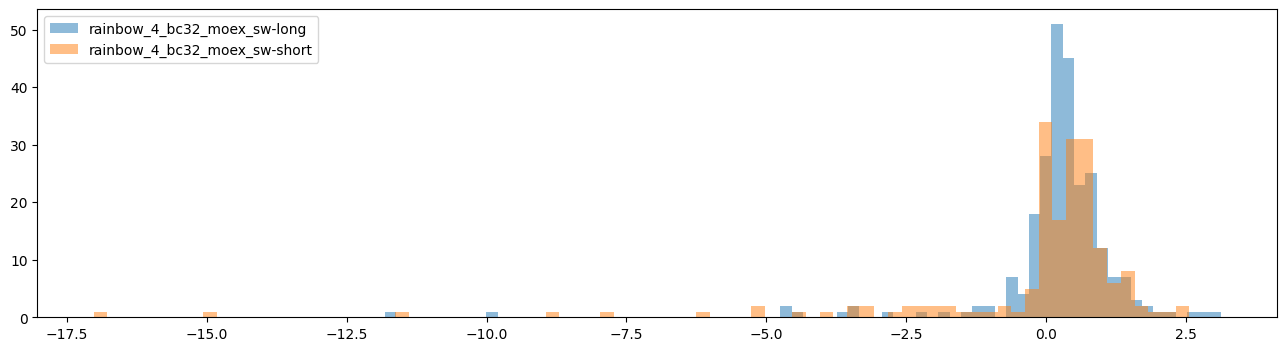

In [4]:
# using_results = ['rainbow_4_bc32_btc_bear', 'rainbow_4_bc32_btc_bull', 'rainbow_4_bc32_btc_sw-long', 'rainbow_4_bc32_btc_sw-short']
using_results = ['rainbow_4_bc32_moex_sw-long', 'rainbow_4_bc32_moex_sw-short']
plt.figure(figsize=(16,4))
for test_type in test_types:
    if test_type not in using_results:
        continue
    plt.hist(data[test_type].profit, bins='auto', label=test_type, alpha=0.5)
plt.legend()

In [5]:
for test_type in using_results:
    print(f'{test_type} avg profit: {data[test_type].profit.mean():.3f}')

rainbow_4_bc32_moex_sw-long avg profit: 0.184
rainbow_4_bc32_moex_sw-short avg profit: -0.225


In [6]:
for test_type in using_results:
    print(f'{test_type} median profit: {data[test_type].profit.median():.3f}')

rainbow_4_bc32_moex_sw-long median profit: 0.307
rainbow_4_bc32_moex_sw-short median profit: 0.422


In [7]:
for test_type in using_results:
    print(f'{test_type} median balance profit: {data[test_type].balance_profit.mean():.3f}')

rainbow_4_bc32_moex_sw-long median balance profit: -0.031
rainbow_4_bc32_moex_sw-short median balance profit: -0.439


In [8]:
clip_value = 2
for test_type in using_results:
    print(f'Clip [-{clip_value}, {clip_value}] {test_type} avg profit: {data[test_type].profit.clip(-clip_value, clip_value).mean():.3f}')

# print(f'Clip [-{clip_value}, {clip_value}] Base avg profit: {base_results.profit.clip(-clip_value,clip_value).mean():.3f}')
# print(f'Clip [-{clip_value}, {clip_value}] Double avg profit: {double_results.profit.clip(-clip_value,clip_value).mean():.3f}')
# print(f'Clip [-{clip_value}, {clip_value}] Dueling avg profit: {dueling_results.profit.clip(-clip_value,clip_value).mean():.3f}')
# print(f'Clip [-{clip_value}, {clip_value}] Rainbow2 avg profit: {rainbow2_results.profit.clip(-clip_value,clip_value).mean():.3f}')

Clip [-2, 2] rainbow_4_bc32_moex_sw-long avg profit: 0.294
Clip [-2, 2] rainbow_4_bc32_moex_sw-short avg profit: 0.172


In [9]:
for test_type in using_results:
    print(f'{test_type} std profit: {data[test_type].profit.std():.3f}')

rainbow_4_bc32_moex_sw-long std profit: 1.372
rainbow_4_bc32_moex_sw-short std profit: 2.465


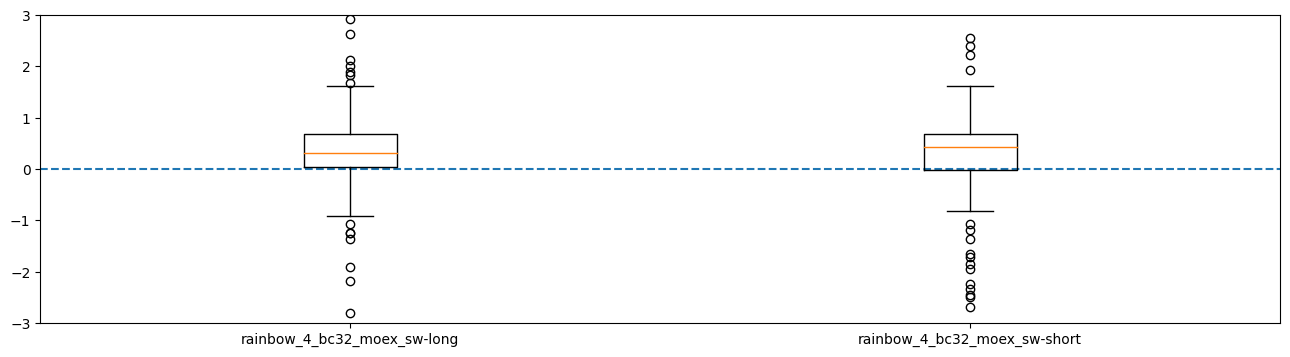

In [10]:
plt.figure(figsize=(16,4))
plt.axhline(0, linestyle='--')
plt.boxplot([data[test_type].profit.values for test_type in using_results], labels=using_results)
plt.ylim(-3,3)
# plt.legend()
print()

In [11]:
for test_type in using_results:
    coef = np.corrcoef(data[test_type].profit, data[test_type].predict_q)
    print(f'{test_type} corr coef with profit and Q value: {coef[0, 1]:.3f}')

rainbow_4_bc32_moex_sw-long corr coef with profit and Q value: 0.067
rainbow_4_bc32_moex_sw-short corr coef with profit and Q value: 0.037


In [12]:
data['rainbow_4_bc32_btc_sw-short']

,entry_step_i,entry_price,entry_balance,predict_q,position_type,close_step_i,close_price,close_balance,train_result_balance,balance_profit,profit
0,772,18306.93,1.000000e+06,1.897454,short,899,21199.99,8.558300e+05,3.270591e+06,-16.845636,-15.803087
1,932,21491.19,1.000000e+06,0.895778,short,933,21468.29,9.991600e+05,4.535375e+06,-0.084075,0.106555
2,937,21424.82,9.991600e+05,1.277582,short,940,21396.52,9.985505e+05,4.535375e+06,-0.061038,0.132090
3,963,21267.60,9.985505e+05,1.337388,short,968,21304.55,9.951901e+05,4.535375e+06,-0.337657,-0.173738
4,972,20754.73,9.951901e+05,2.017290,short,973,20759.66,9.931858e+05,4.535375e+06,-0.201806,-0.023754
...,...,...,...,...,...,...,...,...,...,...,...
285,9668,30513.23,1.000000e+06,0.138935,short,9693,30172.74,1.008253e+06,8.486125e+05,0.818538,1.115877
286,9694,30222.48,1.008253e+06,0.142332,short,9803,30092.50,1.010345e+06,8.486125e+05,0.207027,0.430077
287,9836,30575.77,1.000000e+06,0.060348,short,9920,30321.22,1.005700e+06,8.640899e+05,0.566788,0.832522
288,9921,30357.31,1.005700e+06,0.068482,short,9955,29895.43,1.017675e+06,8.640899e+05,1.176689,1.521479


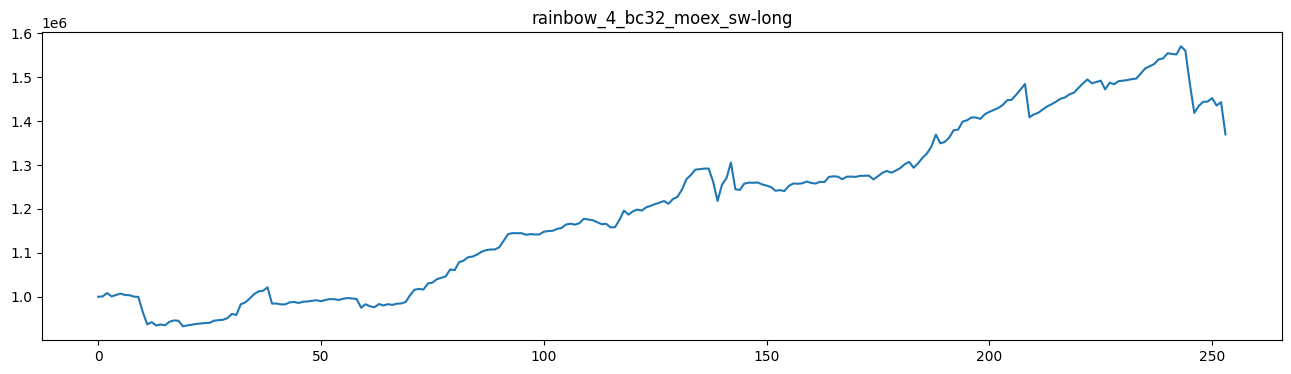

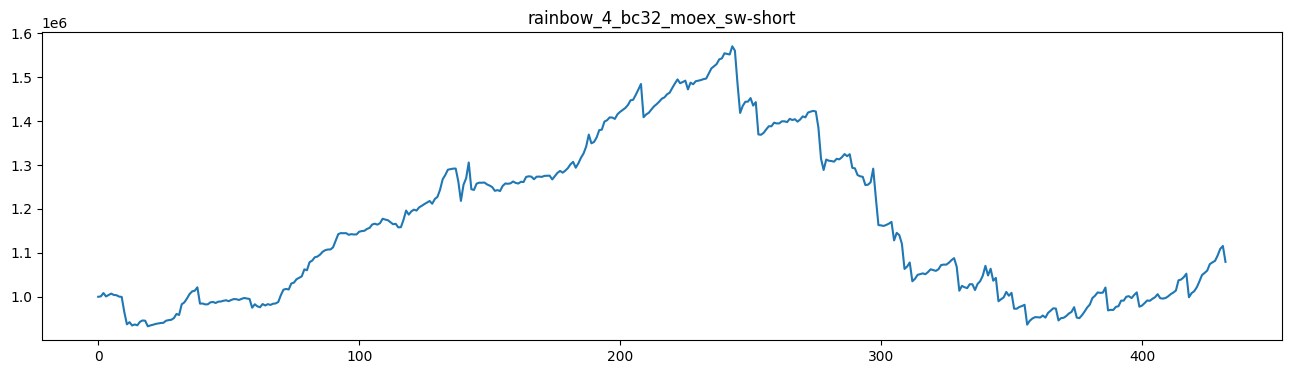

In [13]:
balance_arr = [1_000_000]
comis = 0.0005

for test_type in using_results:
    data[test_type] = data[test_type].reset_index(drop=True)
    for i in range(data[test_type].shape[0]):
        ep, cp, deal_type = data[test_type].at[i, 'entry_price'], data[test_type].at[i, 'close_price'], data[test_type].at[i, 'position_type']
        price_diff = (cp - ep) / ep
        if price_diff > 0.05:
            cp = ep * 1.05
        elif price_diff < -0.05:
            cp = ep * 0.95

        last_balance = balance_arr[-1]
        buy_c = last_balance // ep - 1

        if deal_type == 'long':
            last_balance -= buy_c * ep * (1 + comis)
            last_balance += buy_c * cp * (1 - comis)
        else:
            last_balance += buy_c * ep * (1 - comis)
            last_balance -= buy_c * cp * (1 + comis)
        balance_arr.append(last_balance)
    
    plt.figure(figsize=(16,4))
    plt.title(test_type)
    plt.plot(balance_arr)

In [14]:
def dots_to_line(_df, dot_idx: np.array, line_col: str):
    _df[line_col] = np.nan
    _df.loc[dot_idx, line_col] = _df.loc[dot_idx, 'close']
    return _df

config = Config() 
test_type = 'rainbow_4_bc32_moex_sw-long'
deals_df = data[test_type]
price_df = pd.read_csv(config.data_path).iloc[-10000:].reset_index(drop=True)

price_df = (price_df
    .pipe(lambda _df: dots_to_line(_df, dot_idx=deals_df.entry_step_i.values, line_col='entry_dots'))
    .pipe(lambda _df: dots_to_line(_df, dot_idx=deals_df.close_step_i.values, line_col='close_dots'))    
)

In [15]:
price_df

,open,close,high,low,value,volume,begin,end,entry_dots,close_dots
0,95.40,95.40,95.40,95.40,240408.0,2520,2023-01-03 09:00:00,2023-01-03 09:59:59,NaN,NaN
1,95.40,95.42,96.15,94.90,59790027.4,627080,2023-01-03 10:00:00,2023-01-03 10:59:59,NaN,NaN
2,95.42,95.65,95.90,95.40,13410778.3,140170,2023-01-03 11:00:00,2023-01-03 11:59:59,NaN,NaN
3,95.62,95.47,95.65,95.43,5233924.4,54810,2023-01-03 12:00:00,2023-01-03 12:59:59,NaN,NaN
4,95.45,95.30,95.48,95.25,7772928.6,81510,2023-01-03 13:00:00,2023-01-03 13:59:59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7386,178.51,178.55,179.09,178.00,64618136.6,362200,2024-12-06 19:00:00,2024-12-06 19:59:59,NaN,NaN
7387,178.55,178.66,179.00,178.22,55955950.8,313370,2024-12-06 20:00:00,2024-12-06 20:59:59,NaN,NaN
7388,178.66,178.94,179.16,178.57,36065012.0,201580,2024-12-06 21:00:00,2024-12-06 21:59:59,NaN,NaN
7389,178.94,179.00,179.05,178.90,23868991.2,133360,2024-12-06 22:00:00,2024-12-06 22:59:59,NaN,NaN


In [20]:
# st, ed = 0, 2000
# plt.figure(figsize=(16,4))
# plt.plot(price_df.loc[st:ed, 'close'])
# plt.plot(price_df.loc[st:ed, 'entry_dots'], marker='^', color='g')
# plt.plot(price_df.loc[st:ed, 'close_dots'], marker='v', color='r')

In [21]:
deals_result = data[test_type]
deals_result.groupby('position_type', as_index=False).profit.mean()

,position_type,profit
0,long,-0.001031
1,short,-0.180357


In [22]:
deals_result[['position_type', 'entry_price', 'close_price', 'entry_balance', 'close_balance', 'profit', 'balance_profit']]

,position_type,entry_price,close_price,entry_balance,close_balance,profit,balance_profit
0,short,18970.79,21199.99,1000000.000000,892337.973168,-11.750697,-12.065163
1,short,21491.19,21468.29,1000000.000000,999159.956615,0.106555,-0.084075
2,long,21468.29,21352.77,999159.956615,992527.512113,-0.538096,-0.668238
3,short,21352.77,21442.01,992527.512113,987003.950695,-0.417932,-0.559629
4,long,21442.01,21708.60,987003.950695,996260.639065,1.243307,0.929143
...,...,...,...,...,...,...,...
513,long,27127.78,26594.64,994108.355746,974753.128305,-1.965292,-1.985654
514,short,25750.28,25975.00,1000000.000000,990337.939937,-0.872690,-0.975633
515,long,25975.00,25616.01,990337.939937,976249.294838,-1.382060,-1.443140
516,short,26453.96,30282.04,1000000.000000,867833.231773,-14.470726,-15.229512


In [25]:
deals_result.query('position_type == "long"')[['profit', 'predict_q']].corr()

,profit,predict_q
profit,1.000000,0.041421
predict_q,0.041421,1.000000


In [47]:
deals_result['entry_step_i']

0       764
1       786
2       798
3       801
4       826
       ... 
342    4513
343    4520
344    4589
345    4796
346    4797
Name: entry_step_i, Length: 347, dtype: int64